<a href="https://colab.research.google.com/github/Sirsho1997/BengaliDigits/blob/master/BengaliDigit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing the essential python Libraries**

In [68]:
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds
import numpy as np
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# **Loading the CMATERdb  dataset**

CMATERdb is the pattern recognition database repository created at the 'Center for Microprocessor Applications for Training Education and Research' (CMATER) research laboratory, Jadavpur University, Kolkata 700032, INDIA. This database is free for all non-commercial uses.

It is a balanced dataset of total 6000 Bangla numerals (32x32 RGB coloured, 6000 images), each having 600 images per class (per digit).

In [69]:
#Loading the dataset
(train_x,train_y),(test_x,test_y) = tfds.as_numpy(tfds.load('cmaterdb',split=['train','test'],
                                                        batch_size=-1,as_supervised=True,))

Loading the dataset returns four NumPy arrays:

*   The train_x and train_y arrays are the training set—the data the model uses to learn.
*   The model is tested against the test set, the test_x, and test_y arrays.

The images are 32x32x3 NumPy arrays, with pixel values ranging from 0 to 255. The labels are an array of integers, ranging from 0 to 9. These correspond to the digit the image represents:

Now let us assign classnames to each of the 10 digits.

Each image is mapped to a single class. 

In [70]:
classes = ['0','1','2','3','4','5','6','7','8','9']

# **Preprocess the data**

Each pixel can take any value between 0-255, So it would be wise to normalize the pixel values.

In [71]:
# Normalize pixel values to be between 0 and 1
train_x= train_x / 255.0
test_x= test_x / 255.0

**Looking at one training example**

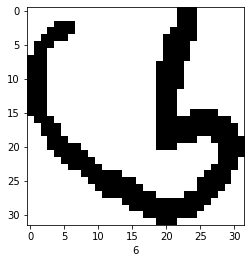

In [74]:
#Look at one training example

index = 0  

plt.imshow(train_x[index] ,cmap=plt.cm.binary)
plt.xlabel(classes[train_y[index]])
plt.show()

# **Build the model**

Building the neural network requires configuring the layers of the model, then compiling the model. The basic building block of a neural network is the layer. Layers extract representations from the data fed into them. Hopefully, these representations are meaningful for the problem at hand.

**CNN Architecture**

A very common architecture for a CNN is a stack of Conv2D and MaxPooling2D layers followed by a few denesly connected layers. The idea is that the stack of convolutional and maxPooling layers extract the features from the image. Then these features are flattened and fed to densly connected layers that determine the class of an image based on the presence of features.


In [76]:
#Set up the layers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

# **Compile the model**

Before the model is ready for training, it needs a few more settings. 

*   Loss function —It measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
*   Optimizer —It decides how the model is updated based on the data it sees and its loss function.

*  Metrics —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.



In [77]:
#Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


# **Train the model**

Training the neural network model requires the following steps:

*   Feed the training data to the model. In this example, the training data is in the train_x and train_y arrays.
*   The model learns to associate images and labels.
*   The model then makes predictions about a test set—in this example, the test_x array.
*   Verify that the predictions match the labels from the test_y array.


In [78]:
model.fit(train_x, train_y, epochs=45,validation_data=(test_x, test_y))

Epoch 1/45
157/157 [==============================] - 1s 8ms/step - loss: 0.8400 - accuracy: 0.7198 - val_loss: 0.3123 - val_accuracy: 0.8970
Epoch 2/45
157/157 [==============================] - 1s 8ms/step - loss: 0.2264 - accuracy: 0.9284 - val_loss: 0.1778 - val_accuracy: 0.9460
Epoch 3/45
157/157 [==============================] - 1s 8ms/step - loss: 0.1249 - accuracy: 0.9592 - val_loss: 0.1339 - val_accuracy: 0.9490
Epoch 4/45
157/157 [==============================] - 1s 8ms/step - loss: 0.0961 - accuracy: 0.9676 - val_loss: 0.1236 - val_accuracy: 0.9590
Epoch 5/45
157/157 [==============================] - 1s 8ms/step - loss: 0.0663 - accuracy: 0.9798 - val_loss: 0.1100 - val_accuracy: 0.9660
Epoch 6/45
157/157 [==============================] - 1s 8ms/step - loss: 0.0499 - accuracy: 0.9844 - val_loss: 0.1055 - val_accuracy: 0.9670
Epoch 7/45
157/157 [==============================] - 1s 8ms/step - loss: 0.0368 - accuracy: 0.9872 - val_loss: 0.0877 - val_accuracy: 0.9750
Epoch 

As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.97 (or 97%) on the training data.

# **Evaluate accuracy**

Next, comparing how the model performs on the test dataset

In [82]:
test_loss, test_accuracy = model.evaluate(test_x,  test_y, verbose=2)
print("Accuracy : ",test_accuracy*100,"%")

32/32 - 0s - loss: 0.1440 - accuracy: 0.9770
Accuracy :  97.69999980926514 %


# **Make predictions** 

With the model trained, one can use it to make predictions about some images. The model's linear outputs, logits. Attach a softmax layer to convert the logits to probabilities, which are easier to interpret.

In [89]:
probability_of_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_x)

# **Plotting several images along with their predictions**


Now plotting several images with their predictions. Note that the model can be wrong even when very confident.

In [90]:
def plottingImage(i, predictions,label, img):
  predictions, label, img = predictions,label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions)
  if predicted_label == label:
    color = 'green'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions),
                                class_names[label]),
                                color=color)

In [92]:

def plottingYValue(i, predictions,label):
  predictions,label = predictions,label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions)

  thisplot[predicted_label].set_color('red')
  thisplot[label].set_color('green')

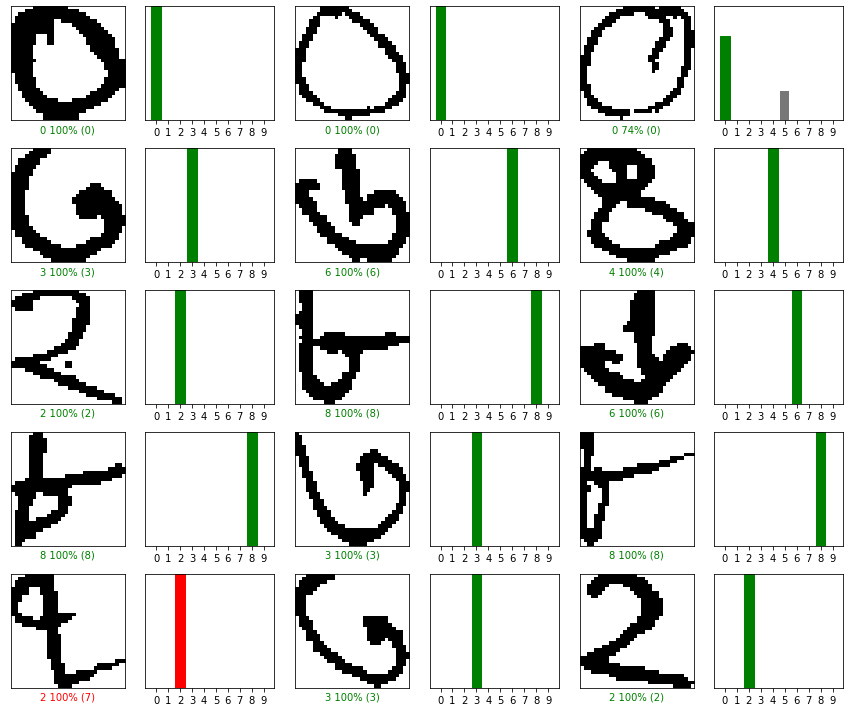

In [93]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plottingImage(i, predictions[i], test_y, test_x)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plottingYValue(i, predictions[i], test_y)
plt.tight_layout()
plt.show()